In [1]:
import scipy.io as sio
from scipy.signal import welch
from scipy.fftpack import rfft
import numpy as np
from matplotlib import pyplot as pl
import seaborn as sns

pl.rcParams['figure.figsize'] = (10, 6)

In [2]:
p1 = sio.loadmat('dataset/P01.mat')

In [3]:
array  = p1['data']
# una matriz tridimensional: trials/epochs x electrodos x muestras en Epoch

### Tomamos un epoch del electrodo 8 de una persona y calculamos welch

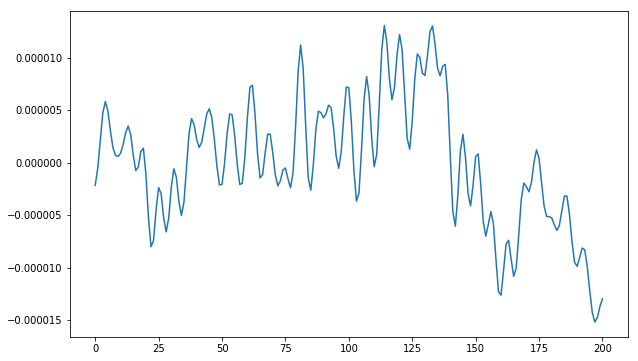

In [4]:
muestras8= array[:,8][0]
muestras8
pl.plot(muestras8)
pl.show()

/usr/local/lib/python2.7/dist-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


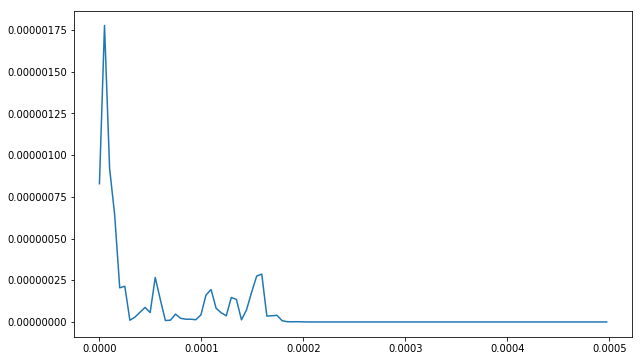

In [5]:
ff= welch(muestras8, fs=0.001)
ff
# pl.xlim(0.000125,0.0002)
pl.plot(ff[0],ff[1])
pl.show()


### Comparo los graficos de las frecuencias con picos con la medicion del electrodo

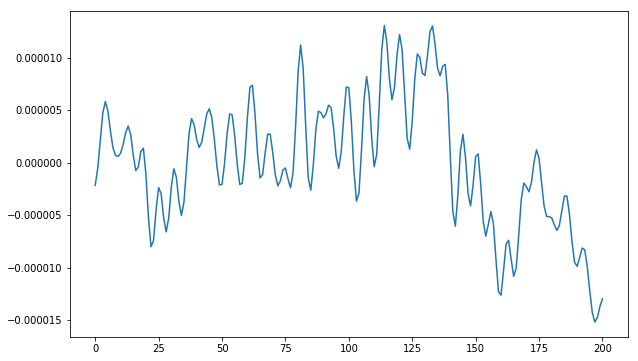

In [6]:
omega = ff[0][31]
pl.plot(muestras8)
# pl.plot([np.sin(x*ff[0][1]) for x in range(0,201)])
# pl.plot([0.000010*np.sin(x/omega) for x in range(0,201)])
pl.show()

### Intentamos promediando los epochs para un electrodo

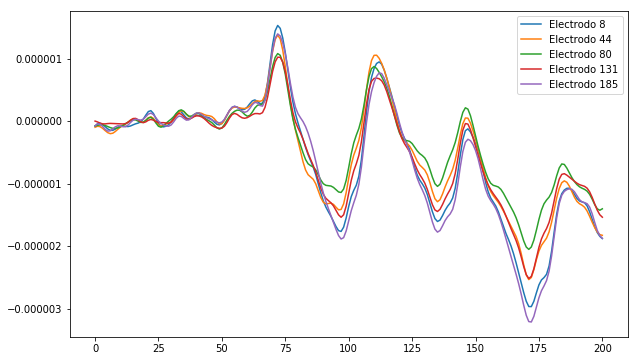

In [8]:
for i in [8,44,80, 131,185]:
    muestras= array[:,i].mean(axis=0)
    pl.plot(muestras, label="Electrodo {}".format(i))
pl.legend(loc='best')
pl.show()

In [53]:
electrodos = [8,44,80, 131,185]
muestras = np.array([0]*201)
for i in electrodos:
    muestras = np.add(muestras,array[:,i])
muestras = muestras/len(electrodos)
# muestras= array[:,8]
fouriers = []
matriz = []
for i in range(len(muestras)):
     freqs, pot = welch(muestras[i], fs=250)
     matriz.append(pot)
npmatriz = np.array(matriz)

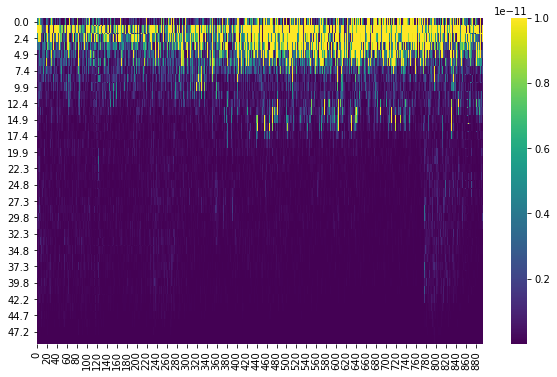

[0.0,
 2.4,
 4.9,
 7.4,
 9.9,
 12.4,
 14.9,
 17.4,
 19.9,
 22.3,
 24.8,
 27.3,
 29.8,
 32.3,
 34.8,
 37.3,
 39.8,
 42.2,
 44.7,
 47.2,
 49.7]

In [54]:
ax = sns.heatmap(npmatriz.transpose()[0:40], cmap="viridis", vmax=1e-11)
freqs = [freq for freq in freqs if freq<50]
freqs = [int(freq*10)/10.0 for freq in freqs]
freqs = [freqs[i] for i in range(len(freqs)) if i%2==0]
ax.set_yticklabels(freqs, rotation='horizontal')
pl.show()
freqs